# CSE 5520 Homework 6

"Visualization of KDE and Monte Carlo method"

| | |
|-|-|
| **Student** | Lynn Pepin ('Tristan Pepin')
|              | tmp13009 / 2079724
| **Due date** | 2021 / Oct / 24 (Sun), 11:59PM

This homework is to help you practice with some data visualization fundamentals.
You are expected to use these visualization techniques and others in your final project.
You are required to do this exercise in Python.
All plots/graphs must have titles and x-y coordinate tick labels. 

In [1]:
# Common imports from Python standard libraries
from dataclasses import dataclass
import math

# Common imports from
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy import cluster
from statistics import mean
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

# Useful imports for visualization
import seaborn

# Other packages
import networkx as nx
import pyvis as pv

# Used for Part 1
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go

# Constants
EPS = 0.0000001
FINAL = True

# Some useful functions
def almost_equal(a,b,eps=EPS):
    return abs(a-b) <= eps

# Code provided from HW4
def stdev(X):
    m = mean(X)
    return math.sqrt(sum((x-m)**2 for x in X) / len(X))

def degreesOfFreedom(X, Y):
    s1 = (stdev(X)**2)
    s2 = (stdev(Y)**2)
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 /
(len(Y) - 1))
    return(df)

# Part 1: Dashboard

This part is to help you get started with your term project
by gently introducing Dashboard creation.

You were given a template code that creates a Dashboard webpage.
Decide one or more data sets of your choice, ideally, related to your term project.
If you do not have one yet, you can use the NBA/LOAD data sets used in previous Homework. 

## Step 1.

Using the data set of your choice, you let user create histograms at different bin sizes. 

In [2]:
df = pd.read_csv('nba.csv')
app = dash.Dash(name="Hella World")

app.layout = html.Div(
    [
        html.Div(
            [
                html.P("Bin sizes"),
                dcc.RadioItems(
                    id = "hist_sizes",
                    options = [{'value' : x, 'label' : x} for x in [2, 5, 10]],
                    value = [2],
                    labelStyle = {'display' : 'inline-block'}
                )
            ]
        ),
        dcc.Graph(
            id = "hist",
            style = {'width' : '60%', 'display' : 'inline-block'},
            clear_on_unhover = True
        )
    ],
    style = {'width': '100%', 'display': 'inline-block'}
)

@app.callback(
    Output("hist", "figure"),
    [Input("hist_sizes", "value")]
)
def display_histogram(hist_sizes=2):
    fig = px.histogram(
        df,
        x='Height',
        nbins=int(len(df) / hist_sizes)
    )
    return fig

app.run_server(port=12345, debug=False)

Dash is running on http://127.0.0.1:12345/

 * Serving Flask app 'Hella World' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:12345/ (Press CTRL+C to quit)


## Step 2. 

Apply Kernel Density Estimation (KDE) to convert your histogram into a KDE plot.
Practice with alternative bandwidths that contrast impact of using different bandwidths.

> **Lynn's notes:** I am doing this part after Part 2, and I found that `sklearn` has a more suitable KDE for this, since we can choose bandwidths.

In [3]:
from sklearn.neighbors import KernelDensity

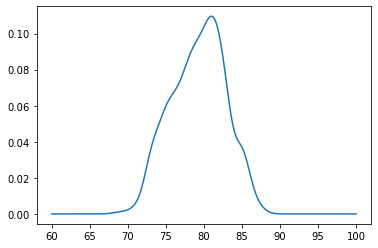

In [4]:
bandwidth = 1.0

data = np.array(df['Height']).reshape(-1,1)

kde = KernelDensity(bandwidth = bandwidth, kernel = 'gaussian')
kde.fit(data)

Xs = np.linspace(60, 100, num = 400) # around the mean of ~80
Ys = np.exp([kde.score([[xx]]) for xx in Xs])

plt.plot(Xs, Ys)

assert almost_equal(
    np.sum(Ys) * (Xs[-1] - Xs[0]) / len(Xs),
    1,
    eps = 0.1
), "Integral of pdf should be roughly 1 if you chose decent margin and bounds"

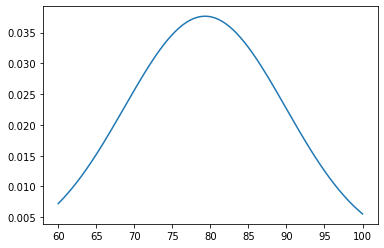

In [5]:
bandwidth = 10.0

# same code, except i change the bandwidth parameter
data = np.array(df['Height']).reshape(-1,1)

kde = KernelDensity(bandwidth = bandwidth, kernel = 'gaussian')
kde.fit(data)

Xs = np.linspace(60, 100, num = 400) # around the mean of ~80
Ys = np.exp([kde.score([[xx]]) for xx in Xs])

plt.plot(Xs, Ys)

assert almost_equal(
    np.sum(Ys) * (Xs[-1] - Xs[0]) / len(Xs),
    1,
    eps = 0.1
), "Integral of pdf should be roughly 1 if you chose decent margin and bounds"

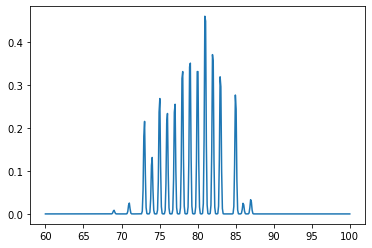

In [6]:
bandwidth = 0.1

# same code, except again, i change the bandwidth parameter
data = np.array(df['Height']).reshape(-1,1)

kde = KernelDensity(bandwidth = bandwidth, kernel = 'gaussian')
kde.fit(data)

Xs = np.linspace(60, 100, num = 400) # around the mean of ~80
Ys = np.exp([kde.score([[xx]]) for xx in Xs])

plt.plot(Xs, Ys)

assert almost_equal(
    np.sum(Ys) * (Xs[-1] - Xs[0]) / len(Xs),
    1,
    eps = 0.1
), "Integral of pdf should be roughly 1 if you chose decent margin and bounds"

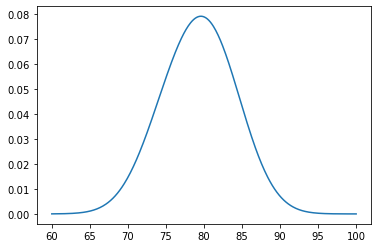

In [7]:
# same code, except again, i change the bandwidth parameter

bandwidth = df['Height'].std()

data = np.array(df['Height']).reshape(-1,1)

kde = KernelDensity(bandwidth = bandwidth, kernel = 'gaussian')
kde.fit(data)

Xs = np.linspace(60, 100, num = 400) # around the mean of ~80
Ys = np.exp([kde.score([[xx]]) for xx in Xs])

plt.plot(Xs, Ys)

assert almost_equal(
    np.sum(Ys) * (Xs[-1] - Xs[0]) / len(Xs),
    1,
    eps = 0.1
), "Integral of pdf should be roughly 1 if you chose decent margin and bounds"

> **Lynn's notes:** I imagine the bandwidth, in a "high level" sense, as being the std-dev of a Gaussian function convoluting over each sample. The shorter it is, the larger the spike for a given sample. So, it seems something around the std-dev of our data is a good choice.

## Step 3.

Create a simple Dashboard that allows the user to choose multiple (minimum three)
different KDE plots using a design similar to the one given below.
Note that the panel on the leftmost is
to enable user to choose different histogram bin sizes/bandwidths.
KDE plot should change based on the choices.

The picture given below is only for illustration purpose.

Depending on your data set(s) the exact look and feel will vary.
You can have your own design.
In providing bandwidth options,
make it obvious that your system suggests bandwidths calculated based on “rule of thumb” discussed in class.

There are multiple ways you can indicate which ones are suggested ones based on “rule of thumb”
(e.g., annotate bandwidths with “Recommended 1” and “Recommended 2.).

In [8]:
bandwidths = [0.3, 1, 3, 10]
Xs = np.linspace(60, 100, num = 400)

def get_Ys(bandwidth = 1.0, data = np.array(df['Height']).reshape(-1,1), Xs=Xs):
    kde = KernelDensity(bandwidth = bandwidth, kernel = 'gaussian')
    kde.fit(data)
    return np.exp([kde.score([[xx]]) for xx in Xs])

all_Ys = {bandwidth : get_Ys(bandwidth) for bandwidth in bandwidths}

all_Ys.keys()

dict_keys([0.3, 1, 3, 10])

In [9]:
df = pd.read_csv('nba.csv')
app = dash.Dash(name="Hella World")

app.layout = html.Div(
    [
        html.Div(
            [
                html.P("Kernel Bandwidth"),
                dcc.RadioItems(
                    id = "bandwidth",
                    options = [{'value' : x, 'label' : x} for x in bandwidths],
                    value = [0.3],
                    labelStyle = {'display' : 'inline-block'}
                )
            ]
        ),
        dcc.Graph(
            id = "plot",
            style = {'width' : '60%', 'display' : 'inline-block'},
            clear_on_unhover = True
        )
    ],
    style = {'width': '100%', 'display': 'inline-block'}
)

@app.callback(
    Output("plot", "figure"),
    [Input("bandwidth", "value")]
)
def display_histogram(bandwidth=0.3):
    fig = px.line(
        x=Xs,
        y=all_Ys[bandwidth],
        title = f"Gaussian KDE with bandwidth {bandwidth:.2f}"
    )
    return fig

app.run_server(port=12345, debug=False)

Dash is running on http://127.0.0.1:12345/

Dash is running on http://127.0.0.1:12345/

 * Serving Flask app 'Hella World' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:12345/ (Press CTRL+C to quit)


## Step 4.

By using a Jupyter markdown cell,
provide a brief explanation for how to use your visualization tool.
It should be brief.

This is just to report your design decisions in creating your visualization framework.
Ideally a good visualization web app should be so obvious that
no instruction for how to use it other than meaningful titles/labels for the components.

> This visualization tool is exactly as described in the homework: The kernel bandwidths, etc. are selected through radio buttons and the graph is updated accordingly.

# Part 2: Monte Carlo Method

Your goal is to find the approximate area ratio (AR)
surrounded by blue, red and green dots using
Monte Carlo sampling method.

Note that here AR = 120/400 = 0.3 where 120 is inclusive of the
surrounding-colored dots
(except 5 blue dots external to the triangular area).

In [10]:
np.random.seed(1634420117)

## Step 1.

Write a code placing 1000 dots using
uniform random distribution for both x and y values
within the yellow boxed region that are smaller than
the ones appearing on the grid so that you can see
where the randomly generated dots land. Dots must
appear only on the grid intersection. In this step, you
are only showing the placement of dots.

In [11]:
# First, we establish a list [0.00, 0.5, 1.0, ..., 9.0, 9.5]
grid_marks = np.linspace(0,10,20,endpoint=False)
grid_marks

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [12]:
# Now, we write code to randomly sample it
get_n_pts = lambda nn: np.random.choice(grid_marks, nn)
get_n_pts(10)

array([5.5, 9.5, 7.5, 7.5, 2.5, 6. , 8. , 1. , 8. , 5.5])

In [13]:
# Finally, let's get 1000 points

get_n_coords = lambda nn: np.stack((get_n_pts(nn), get_n_pts(nn))).T
rand_pts_1k = get_n_coords(1000)

# We should expect shape (2, 1000)
# and mean around 4.74
print(rand_pts_1k.shape)
print(rand_pts_1k.mean(axis=0))

(1000, 2)
[4.6865 4.7045]


In [14]:
# grid_marks = [0., .5, 1., 1.5, ..., 9.0, 9.5]
# get_n_pts(nn) --> randomly chosen nn values
# get_n_coords(nn) --> randomly chosen coords, i.e. (2, nn) pts

## Step 2. 

Write a code computing AR.

One issue you have to think is how to count multiple dots that can potentially land on the same spot.

Should each landing be counted or not for the calculation?

> I don't think it actually matters. Each tile has roughly the same likelihood of receiving a "dot" placed.
> 
> If we conceptualize this as "area covered" (e.g. paint falling on a surface) then we expect to calculate area correctly.
> 
> If we instead conceptualize this as "volume covered" (e.g. volume of rainfall falling on a surface) then we still expect to calculate correctly.
> 
> Consider a similar experiment, uniformly generating integers from 0 to 9999, and we want to see what percent are less than 3000. This, we would expect to be 30%. We see that this happens:

In [15]:
# Example 1: Do not double-count
def trial_dont_double_count(nn = 1_000_000):
    numbers = np.zeros(10000)
    indices = np.random.choice(list(range(10000)), nn)
    numbers[indices] = 1
    
    return np.sum(numbers[:3000]) / np.sum(numbers)

def trials_dont_double_count(nn, num=100):
    return np.array([trial_dont_double_count(nn) for _ in range(num)]).mean()

for xx in range(0,6):
    print(f"Sampling 10^{xx} points, not double-counting, gives us {trials_dont_double_count(nn=int(10**xx))}")

Sampling 10^0 points, not double-counting, gives us 0.34
Sampling 10^1 points, not double-counting, gives us 0.30500000000000005
Sampling 10^2 points, not double-counting, gives us 0.2998869689956583
Sampling 10^3 points, not double-counting, gives us 0.3023736391380359
Sampling 10^4 points, not double-counting, gives us 0.29996986779874096
Sampling 10^5 points, not double-counting, gives us 0.299999000360164


In [16]:
# Example 2: Double-count
def trial_double_count(nn = 500_000):
    numbers = np.zeros(10000)
    indices = np.random.choice(list(range(10000)), nn)
    for idx in indices:
        numbers[idx] += 1
    
    return np.sum(numbers[:3000]) / np.sum(numbers)

def trials_double_count(nn, num=20):
    return np.array([trial_double_count(nn) for _ in range(num)]).mean()

for xx in range(0,6):
    print(f"Sampling 10^{xx} points, not double-counting, gives us {trials_double_count(nn=int(10**xx))}")

Sampling 10^0 points, not double-counting, gives us 0.4
Sampling 10^1 points, not double-counting, gives us 0.3
Sampling 10^2 points, not double-counting, gives us 0.3195
Sampling 10^3 points, not double-counting, gives us 0.29725
Sampling 10^4 points, not double-counting, gives us 0.300945
Sampling 10^5 points, not double-counting, gives us 0.30031500000000005


> Now we continue, and actually calculate AR.

In [17]:
def in_AR(coord):
    x = coord[0]
    y = coord[1]
    
    if x < 1.0:
        return False
    if y > 8.0:
        return False
    if y - x < 0:
        return False
    
    return True


total_in_AR_from_coords = lambda CC: np.sum([in_AR(coord) for coord in CC])

In [18]:
AR_ratio = total_in_AR_from_coords(rand_pts_1k) / len(rand_pts_1k)

print(f"From 10_000 points, we estimate this region is {AR_ratio}% of the total area.")


From 10_000 points, we estimate this region is 0.297% of the total area.


## Step 3.

Step 3. Repeat Step 2 1000 times to estimate $\mu$ and $\sigma$ for ARs. Since printing 1000 $\mu$'s and $\sigma$'s is
cumbersome, create a histogram for the generated values. Perform KDE and show the histogram
and its KDE side by side (Do not use the same seed for each run).

> **Note:** I use an initial starting seed for reproducability, but Numpy updates its entropy from this seed with each run. (A 'session seed', if you will.)

(With mean = 0.30037 and std = 0.01415)


Text(0.5, 0, 'Ratio')

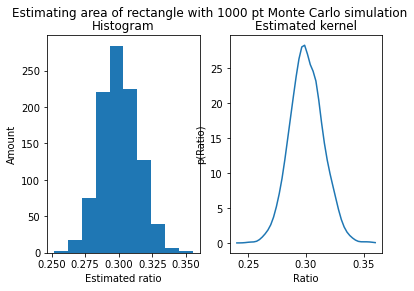

In [19]:
ratio_values = np.array(
    [total_in_AR_from_coords(
        get_n_coords(1000)
    )/1000 for _ in range(1000)
    ]
)

kde = gaussian_kde(ratio_values)
Xs = np.linspace(0.24, 0.36)
Ys = kde.evaluate(Xs)


fig, axs = plt.subplots(1,2)
plt.suptitle("Estimating area of rectangle with 1000 pt Monte Carlo simulation")
print(f"(With mean = {ratio_values.mean():.5f} and std = {ratio_values.std():.5f})")

axs[0].hist(ratio_values)
axs[0].set_title("Histogram")
axs[0].set_ylabel("Amount")
axs[0].set_xlabel("Estimated ratio")

axs[1].plot(Xs, Ys)
axs[1].set_title("Estimated kernel")
axs[1].set_ylabel("p(Ratio)")
axs[1].set_xlabel("Ratio")

## Step 4.

 Repeat Steps 1 – 3 for 500 dots. 

(With mean = 0.29928 and std = 0.01961)


Text(0.5, 0, 'Ratio')

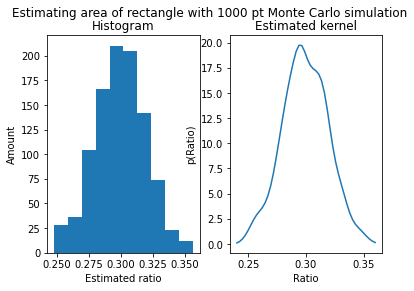

In [20]:
ratio_values = np.array(
    [total_in_AR_from_coords(
        get_n_coords(500)
    )/500 for _ in range(1000)
    ]
)

kde = gaussian_kde(ratio_values)
Xs = np.linspace(0.24, 0.36)
Ys = kde.evaluate(Xs)


fig, axs = plt.subplots(1,2)
plt.suptitle("Estimating area of rectangle with 1000 pt Monte Carlo simulation")
print(f"(With mean = {ratio_values.mean():.5f} and std = {ratio_values.std():.5f})")

axs[0].hist(ratio_values)
axs[0].set_title("Histogram")
axs[0].set_ylabel("Amount")
axs[0].set_xlabel("Estimated ratio")

axs[1].plot(Xs, Ys)
axs[1].set_title("Estimated kernel")
axs[1].set_ylabel("p(Ratio)")
axs[1].set_xlabel("Ratio")

## Step 5.

Discuss your finding when you compare the cases of using 500 dots and 1000 dots using
a markdown cell. 

> I notice that, even though 500 dots per 1000 trials should be plenty, the 500-dot version has a less neat and symmetrical shape. But I am not surprised that the 500 dot version has a larger standard-deviation, since it has half the datapoints in total.